1.0


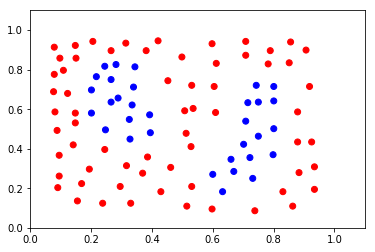

In [114]:
# Import statements 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# ---- Read the data. ----
data = np.asarray(pd.read_csv('data.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

# ---- show data ----
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.scatter(X[:,0], X[:,1], c=y, cmap=ListedColormap(['blue', 'red']))
plt.xlim(0, 1.1)  
plt.ylim(0, 1.1)  


# Create the model and assign it to the variable model.
# Find the right parameters for this model to achieve 100% accuracy on the dataset.
model = SVC(kernel='rbf',gamma='auto', C = 836800)

# ---- Fit the model.----
model.fit(X,y)

# ---- Make predictions. Store them in the variable y_pred.----
y_pred = model.predict(X)

# ---- Calculate the accuracy and assign it to the variable acc.----
acc = accuracy_score(y_pred, y)
print(acc)



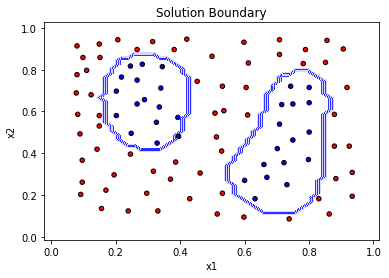

In [117]:

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 0.1, x.max() + 0.1
    y_min, y_max = y.min() - 0.1, y.max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

clf = model
title = 'Solution Boundary'

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
ax = plt

plot_contours(ax, clf, xx, yy, colors=['white', 'blue'], alpha=0.8)

ax.scatter(X0, X1, c=y, cmap=ListedColormap(['blue', 'red']), s=20, edgecolors='k')
ax.xlim(xx.min(), xx.max())
ax.ylim(yy.min(), yy.max())
ax.xlabel('x1')
ax.ylabel('x2')
ax.title(title)
plt.show()
